<a href="https://colab.research.google.com/github/purnankether/Data-Science-Machine-Learning/blob/main/EDA_Coal_Industry_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Coal Industry Data_Price prediction_1.csv')

In [ ]:
# 1. Quick glance at the dataset
# print("First 5 rows of the dataset:")
df.head(10)

,Date,Production,Sales,Inventory,Power_Generation,Price
0,01-01-2020,5149.01,4351.04,10833.75,12160.01,44.77
1,02-01-2020,4977.53,4395.65,10637.96,12208.68,50.85
2,03-01-2020,5232.16,4640.40,NaN,12989.73,56.41
3,04-01-2020,5513.26,NaN,10817.16,NaN,57.10
4,05-01-2020,5004.09,4471.42,10394.90,12491.59,NaN
5,06-01-2020,5021.40,4600.07,NaN,NaN,59.94
6,07-01-2020,5581.89,5400.94,10232.46,13429.78,57.60
7,08-01-2020,5353.86,4853.39,10551.85,12381.15,NaN
8,09-01-2020,4997.17,4548.97,NaN,12772.14,56.89
9,10-01-2020,5313.92,4767.64,10931.55,12555.86,57.80


In [ ]:
# 2. Summary of the dataset
print("\nSummary information of the dataset:")
print(df.info())


Summary information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              100 non-null    object 
 1   Production        91 non-null     float64
 2   Sales             93 non-null     float64
 3   Inventory         91 non-null     float64
 4   Power_Generation  90 non-null     float64
 5   Price             90 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.8+ KB
None


In [ ]:
# 3. Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Date                 0
Production           9
Sales                7
Inventory            9
Power_Generation    10
Price               10
dtype: int64


In [ ]:
# Alternatively, we can use fillna() to fill missing values with mean/median/mode
df_cleaned = df.fillna(df.mean(numeric_only= True))
df_cleaned

,Date,Production,Sales,Inventory,Power_Generation,Price
0,01-01-2020,5149.01000,4351.040000,10833.750000,12160.010000,44.770
1,02-01-2020,4977.53000,4395.650000,10637.960000,12208.680000,50.850
2,03-01-2020,5232.16000,4640.400000,10501.389011,12989.730000,56.410
3,04-01-2020,5513.26000,4515.071505,10817.160000,12515.219111,57.100
4,05-01-2020,5004.09000,4471.420000,10394.900000,12491.590000,56.169
...,...,...,...,...,...,...
95,05-04-2020,4635.28000,4248.810000,10317.170000,12083.050000,56.840
96,06-04-2020,5145.18000,4453.890000,10781.250000,11716.020000,47.390
97,07-04-2020,5017.01967,4635.300000,10511.600000,13235.020000,55.660
98,08-04-2020,5020.55000,4530.130000,10571.700000,12453.000000,50.890


In [ ]:
# 3. Check for missing values
print("\nMissing values in each column:")
print(df_cleaned.isnull().sum())


Missing values in each column:
Date                0
Production          0
Sales               0
Inventory           0
Power_Generation    0
Price               0
dtype: int64


In [ ]:
# 5. Check for duplicates and remove if any
df_cleaned = df_cleaned.drop_duplicates()

df_cleaned

,Date,Production,Sales,Inventory,Power_Generation,Price
0,01-01-2020,5149.01000,4351.040000,10833.750000,12160.010000,44.770
1,02-01-2020,4977.53000,4395.650000,10637.960000,12208.680000,50.850
2,03-01-2020,5232.16000,4640.400000,10501.389011,12989.730000,56.410
3,04-01-2020,5513.26000,4515.071505,10817.160000,12515.219111,57.100
4,05-01-2020,5004.09000,4471.420000,10394.900000,12491.590000,56.169
...,...,...,...,...,...,...
95,05-04-2020,4635.28000,4248.810000,10317.170000,12083.050000,56.840
96,06-04-2020,5145.18000,4453.890000,10781.250000,11716.020000,47.390
97,07-04-2020,5017.01967,4635.300000,10511.600000,13235.020000,55.660
98,08-04-2020,5020.55000,4530.130000,10571.700000,12453.000000,50.890


In [ ]:
# 6. Data type conversion (if needed)
# For example, converting 'Date' column to datetime if it's not already
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'],  format='%d-%m-%Y')
df_cleaned['Date']

,Date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
95,2020-04-05
96,2020-04-06
97,2020-04-07
98,2020-04-08


In [ ]:
# 7. Descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df_cleaned.describe())


Descriptive statistics of the dataset:
                      Date  Production        Sales     Inventory  \
count                  100   100.00000   100.000000    100.000000   
mean   2020-02-19 12:00:00  5017.01967  4515.071505  10501.389011   
min    2020-01-01 00:00:00  4271.31000  3839.580000   9876.710000   
25%    2020-01-25 18:00:00  4890.89750  4348.375000  10333.527500   
50%    2020-02-19 12:00:00  5017.01967  4515.071505  10501.389011   
75%    2020-03-15 06:00:00  5190.13750  4664.360000  10638.837500   
max    2020-04-09 00:00:00  5643.14000  5400.940000  10943.230000   
std                    NaN   291.85163   297.444661    222.156820   

       Power_Generation       Price  
count        100.000000  100.000000  
mean       12515.219111   56.169000  
min        11612.360000   41.360000  
25%        12192.105000   50.782500  
50%        12515.219111   56.169000  
75%        12776.340000   58.667500  
max        13578.360000  106.880000  
std          412.264488    8.80908

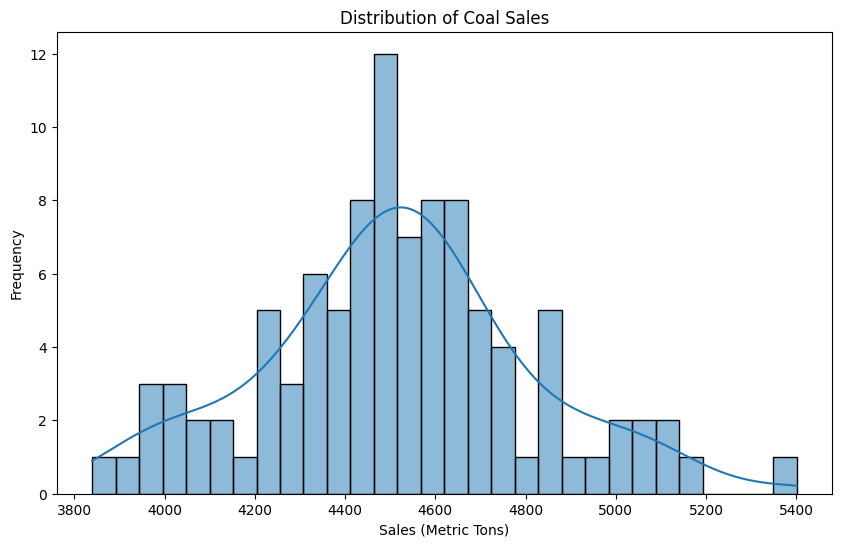

In [ ]:
# 8. Univariate analysis (Distribution of Coal Production)
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['Sales'], kde=True, bins=30)
plt.title('Distribution of Coal Sales')
plt.xlabel('Sales (Metric Tons)')
plt.ylabel('Frequency')
plt.show()

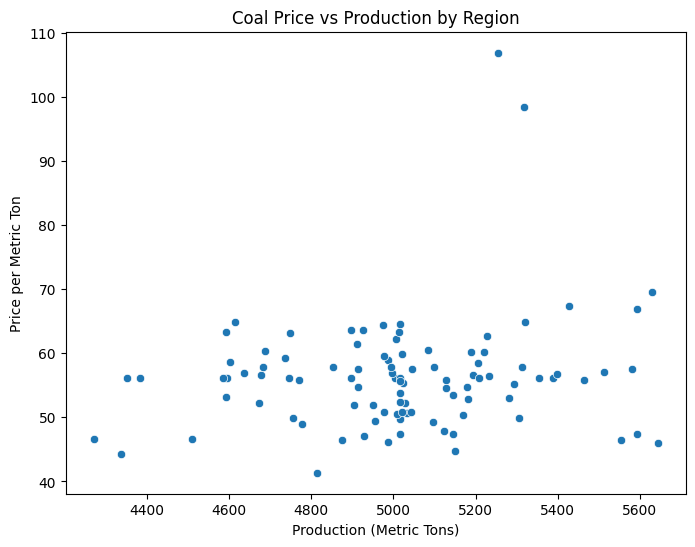

In [ ]:
# 9. Bivariate analysis (Price vs Production)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Production', y='Price', data=df_cleaned)
plt.title('Coal Price vs Production by Region')
plt.xlabel('Production (Metric Tons)')
plt.ylabel('Price per Metric Ton')
plt.show()

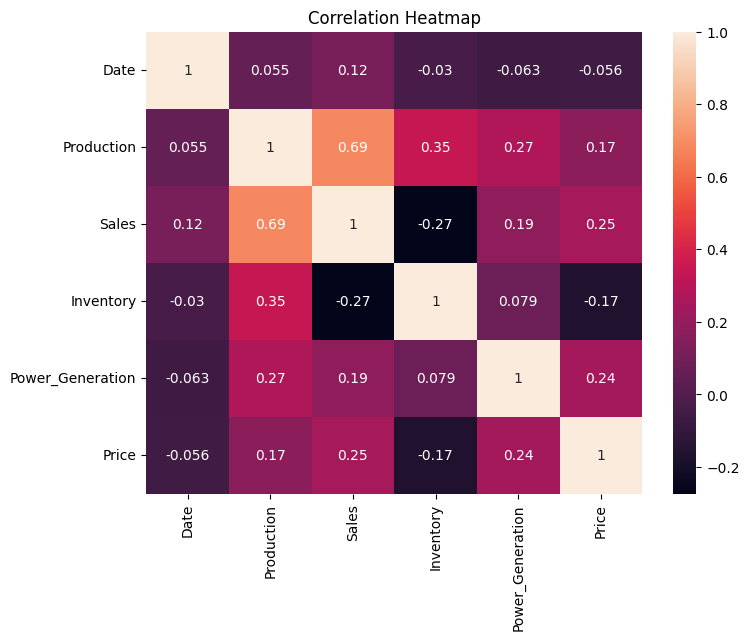

In [ ]:
# 10. Correlation matrix and heatmap
plt.figure(figsize=(8,6))
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

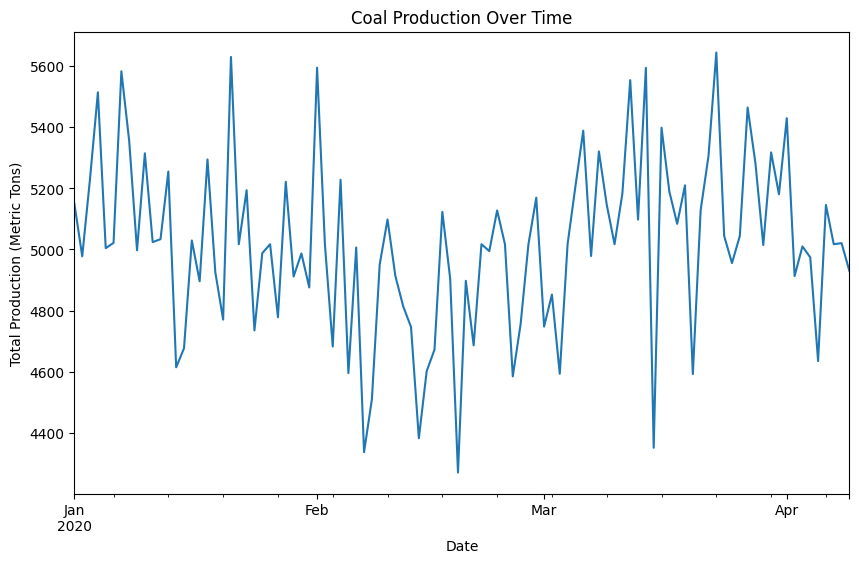

In [ ]:
# 11. Time-series analysis (if applicable)
plt.figure(figsize=(10, 6))
df_cleaned.groupby('Date')['Production'].sum().plot()
plt.title('Coal Production Over Time')
plt.xlabel('Date')
plt.ylabel('Total Production (Metric Tons)')
plt.show()

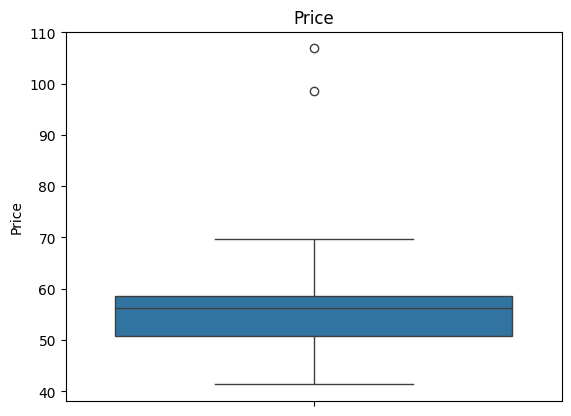

In [ ]:
#Finding outliers
# Boxplot for 'Price'
sns.boxplot(data=df_cleaned['Price'])
plt.title('Price')
plt.show()

In [ ]:
# 12. Handling outliers (example: removing outliers in 'Price' column using IQR method)
Q1 = df_cleaned['Price'].quantile(0.25)
Q3 = df_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_cleaned = df_cleaned[(df_cleaned['Price'] >= lower_bound) & (df_cleaned['Price'] <= upper_bound)]

In [ ]:
print("\nDataset shape after outlier removal: ", df_cleaned.shape)

# 13. Final cleaned dataset ready for modeling or further analysis
print("\nCleaned dataset preview:")
print(df_cleaned.head())


Dataset shape after outlier removal:  (98, 6)

Cleaned dataset preview:
        Date  Production        Sales     Inventory  Power_Generation   Price
0 2020-01-01     5149.01  4351.040000  10833.750000      12160.010000  44.770
1 2020-01-02     4977.53  4395.650000  10637.960000      12208.680000  50.850
2 2020-01-03     5232.16  4640.400000  10501.389011      12989.730000  56.410
3 2020-01-04     5513.26  4515.071505  10817.160000      12515.219111  57.100
4 2020-01-05     5004.09  4471.420000  10394.900000      12491.590000  56.169


In [ ]:
df_cleaned

,Date,Production,Sales,Inventory,Power_Generation,Price
0,2020-01-01,5149.01000,4351.040000,10833.750000,12160.010000,44.770
1,2020-01-02,4977.53000,4395.650000,10637.960000,12208.680000,50.850
2,2020-01-03,5232.16000,4640.400000,10501.389011,12989.730000,56.410
3,2020-01-04,5513.26000,4515.071505,10817.160000,12515.219111,57.100
4,2020-01-05,5004.09000,4471.420000,10394.900000,12491.590000,56.169
...,...,...,...,...,...,...
95,2020-04-05,4635.28000,4248.810000,10317.170000,12083.050000,56.840
96,2020-04-06,5145.18000,4453.890000,10781.250000,11716.020000,47.390
97,2020-04-07,5017.01967,4635.300000,10511.600000,13235.020000,55.660
98,2020-04-08,5020.55000,4530.130000,10571.700000,12453.000000,50.890


In [ ]:
# prompt: split date in to day, week number and year

df_cleaned['day'] = df_cleaned['Date'].dt.day
df_cleaned['week'] = df_cleaned['Date'].dt.isocalendar().week
df_cleaned['year'] = df_cleaned['Date'].dt.year

df_cleaned[['Date', 'day', 'week', 'year']].head()

/tmp/ipython-input-27-976889787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['day'] = df_cleaned['Date'].dt.day
/tmp/ipython-input-27-976889787.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['week'] = df_cleaned['Date'].dt.isocalendar().week
/tmp/ipython-input-27-976889787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

,Date,day,week,year
0,2020-01-01,1,1,2020
1,2020-01-02,2,1,2020
2,2020-01-03,3,1,2020
3,2020-01-04,4,1,2020
4,2020-01-05,5,1,2020


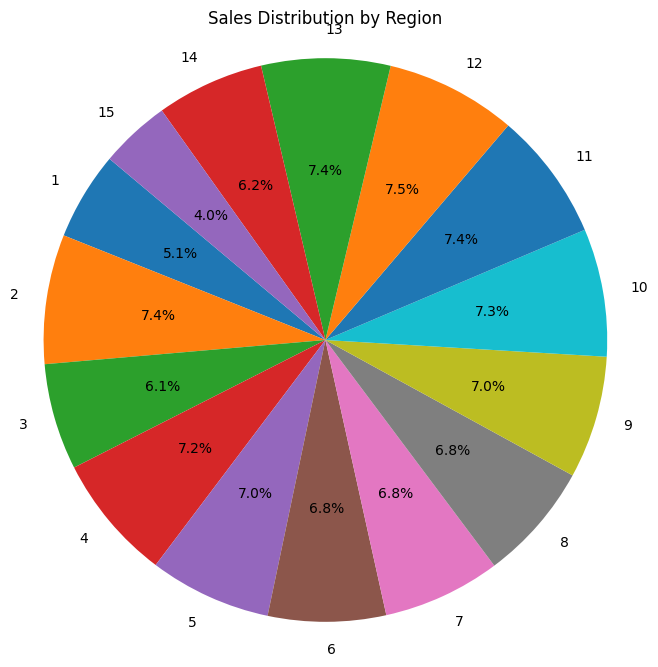

In [ ]:
# prompt: draw pie chart of sales with percentage

# Group by region and sum the sales
region_sales = df_cleaned.groupby('week')['Sales'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()